In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.duplicated().sum()

0

In [8]:
# passengerId, name and Ticket these columns can be dropped
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [12]:
# for the cabin column, approximately 77.11% of the data is missing therefore it is safe to to drop this feature
data.drop(['Cabin'],axis=1,inplace = True)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
# we will deal with age column later

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
data_age = data.dropna()

<AxesSubplot:>

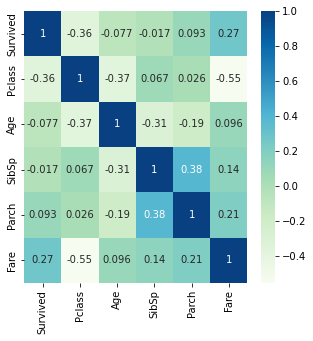

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(data_age.corr(),cmap = "GnBu", annot = True)

In [17]:
cols = ['Pclass','SibSp','Parch','Fare','Age']

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
A = impute_it.fit_transform(data[cols])

In [19]:
A = pd.DataFrame(A)

In [20]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [21]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
B = impute_knn.fit_transform(data[cols])
data.drop(['Age'],axis = 1,inplace=True)
B = pd.DataFrame(B)
data['Age'] = (A.iloc[:,4]+B.iloc[:,4])/2

In [22]:
data.duplicated().sum()

111

In [23]:
data.drop_duplicates(inplace=True)

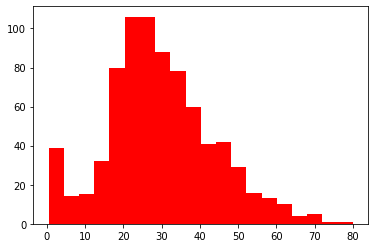

In [26]:
plt.hist(data.Age,bins=20,color="red",label = "Age")
plt.show()

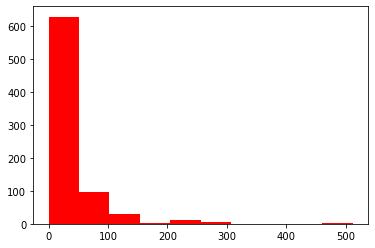

In [27]:
plt.hist(data.Fare,bins=10,color="red",label = "Age")
plt.show()

<BarContainer object of 2 artists>

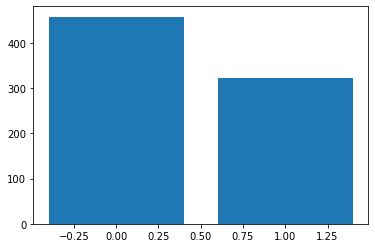

In [28]:
x= data['Survived'].value_counts()
plt.bar(x.keys(),x)

<BarContainer object of 3 artists>

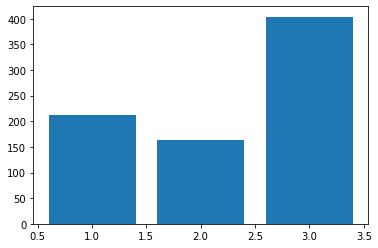

In [29]:
x= data['Pclass'].value_counts()
plt.bar(x.keys(),x)

<BarContainer object of 7 artists>

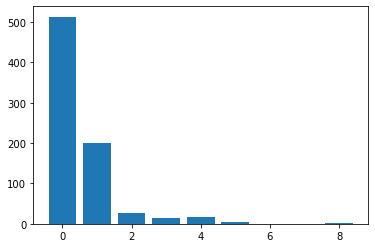

In [30]:
x= data['SibSp'].value_counts()
plt.bar(x.keys(),x)

<BarContainer object of 7 artists>

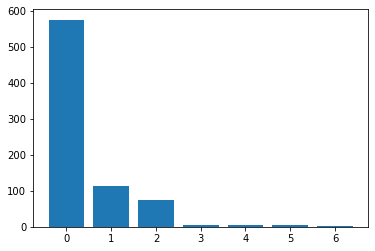

In [31]:
x= data['Parch'].value_counts()
plt.bar(x.keys(),x)

<BarContainer object of 3 artists>

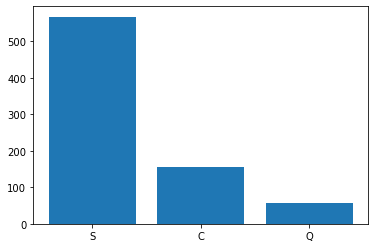

In [32]:
x= data['Embarked'].value_counts()
plt.bar(x.keys(),x)

<BarContainer object of 2 artists>

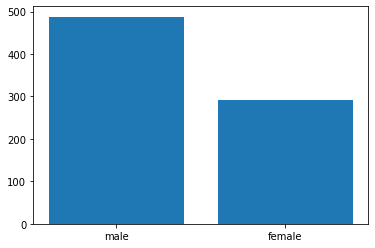

In [33]:
x= data['Sex'].value_counts()
plt.bar(x.keys(),x)

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Sex'])
data['embarked'] = label.fit_transform(data['Embarked'])
data.drop(['Sex',"Embarked"],axis=1,inplace=True)

<AxesSubplot:>

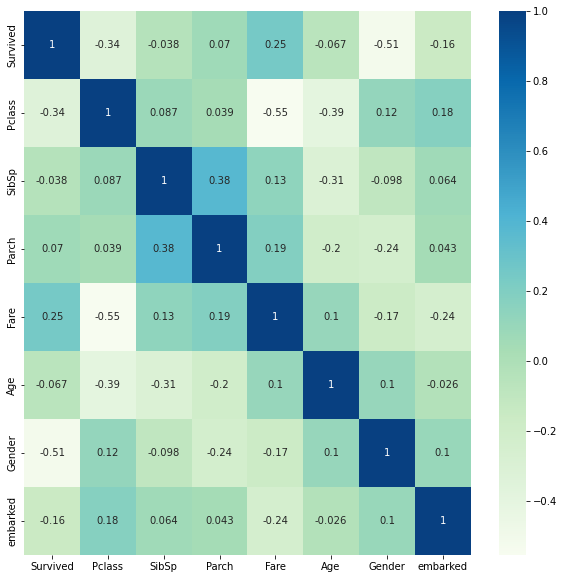

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap = "GnBu", annot = True)

In [36]:
pd.crosstab(data.Survived, data.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,77,81,300,458
1,135,83,104,322
All,212,164,404,780


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

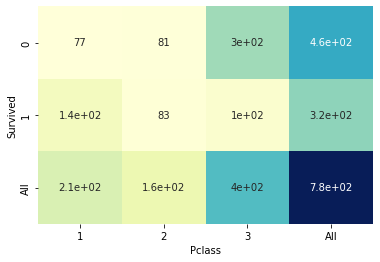

In [37]:
sns.heatmap(pd.crosstab(data.Survived, data.Pclass,margins=True),cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

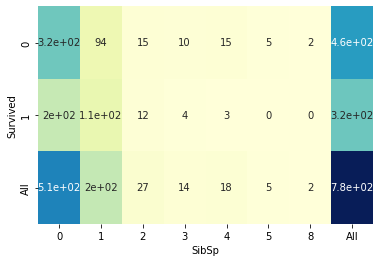

In [38]:
sns.heatmap(pd.crosstab(data.Survived, data.SibSp,margins=True),cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

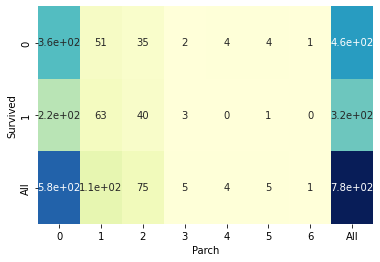

In [39]:
sns.heatmap(pd.crosstab(data.Survived, data.Parch,margins=True),cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Gender', ylabel='Survived'>

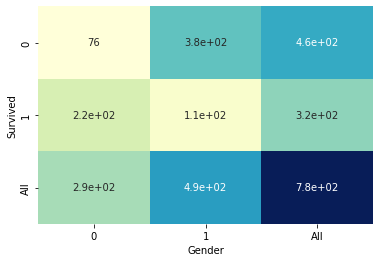

In [40]:
sns.heatmap(pd.crosstab(data.Survived, data.Gender,margins=True),cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='embarked', ylabel='Survived'>

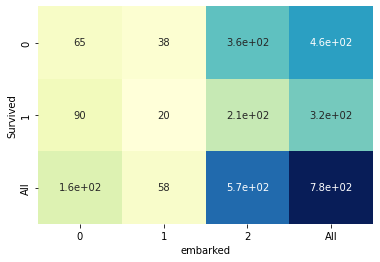

In [41]:
sns.heatmap(pd.crosstab(data.Survived, data.embarked,margins=True),cmap="YlGnBu", annot=True, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

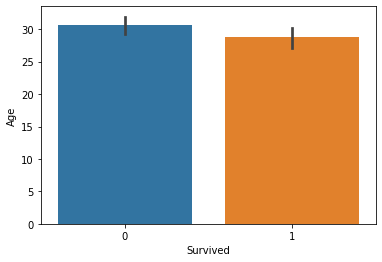

In [42]:
sns.barplot(x='Survived',y='Age',data=data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

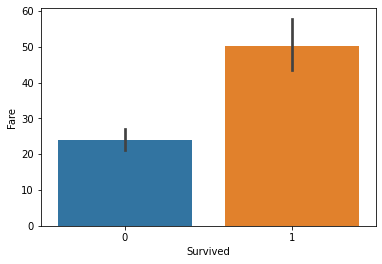

In [43]:
sns.barplot(x='Survived',y='Fare',data=data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

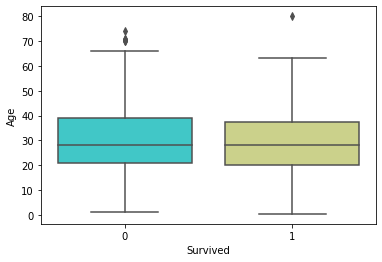

In [44]:
sns.boxplot(x='Survived',y='Age',data=data,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

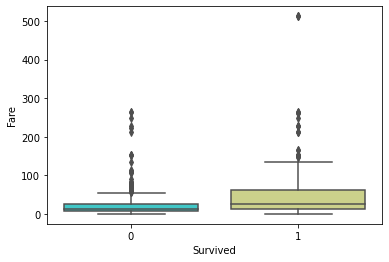

In [45]:
sns.boxplot(x='Survived',y='Fare',data=data,palette='rainbow')

<AxesSubplot:xlabel='Age'>

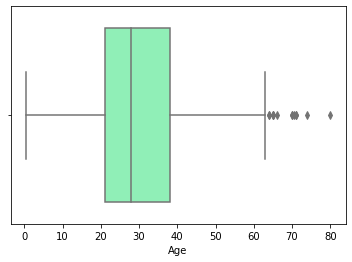

In [46]:
sns.boxplot(x='Age',data=data,palette='rainbow')

<AxesSubplot:xlabel='Fare'>

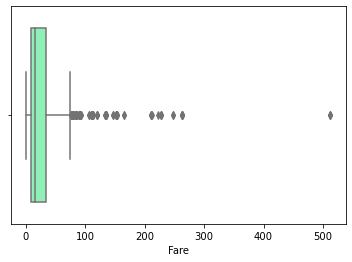

In [47]:
sns.boxplot(x='Fare',data=data,palette='rainbow')

In [48]:
A = np.percentile(data,25,interpolation = 'midpoint')
B = np.percentile(data,75,interpolation = 'midpoint')
I = B - A

In [49]:
upper = data >= (B + 3*I)
print(upper)

     Survived  Pclass  SibSp  Parch   Fare   Age  Gender  embarked
0       False   False  False  False  False  True   False     False
1       False   False  False  False   True  True   False     False
2       False   False  False  False  False  True   False     False
3       False   False  False  False   True  True   False     False
4       False   False  False  False  False  True   False     False
..        ...     ...    ...    ...    ...   ...     ...       ...
885     False   False  False  False   True  True   False     False
887     False   False  False  False   True  True   False     False
888     False   False  False  False   True  True   False     False
889     False   False  False  False   True  True   False     False
890     False   False  False  False  False  True   False     False

[780 rows x 8 columns]


In [50]:
data.head()

,Survived,Pclass,SibSp,Parch,Fare,Age,Gender,embarked
0,0,3,1,0,7.2500,22.0,1,2
1,1,1,1,0,71.2833,38.0,0,0
2,1,3,0,0,7.9250,26.0,0,2
3,1,1,1,0,53.1000,35.0,0,2
4,0,3,0,0,8.0500,35.0,1,2


In [51]:
data.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age,Gender,embarked
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,0.525641,0.417949,34.829108,29.923723,0.625641,1.528205
std,0.492657,0.854452,0.988046,0.838536,52.263440,14.009945,0.484267,0.804655
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,8.050000,21.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,15.950000,28.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,34.375000,38.000000,1.000000,2.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000,2.000000


In [68]:
from scipy import stats
z = np.abs(stats.zscore(data)>2)
z = pd.DataFrame(z)

In [69]:
print(z)

     Survived  Pclass  SibSp  Parch   Fare    Age  Gender  embarked
0       False   False  False  False  False  False   False     False
1       False   False  False  False  False  False   False     False
2       False   False  False  False  False  False   False     False
3       False   False  False  False  False  False   False     False
4       False   False  False  False  False  False   False     False
..        ...     ...    ...    ...    ...    ...     ...       ...
885     False   False  False   True  False  False   False     False
887     False   False  False  False  False  False   False     False
888     False   False  False  False  False  False   False     False
889     False   False  False  False  False  False   False     False
890     False   False  False  False  False  False   False     False

[780 rows x 8 columns]


In [71]:
z[z['Age']==True]['Age'].sum()

32

In [72]:
z[z['Fare']==True]['Fare'].sum()

31

In [73]:
data = data[(np.abs(stats.zscore(data)) < 2).all(axis=1)]

In [74]:
print(data)

     Survived  Pclass  SibSp  Parch     Fare        Age  Gender  embarked
0           0       3      1      0   7.2500  22.000000       1         2
1           1       1      1      0  71.2833  38.000000       0         0
2           1       3      0      0   7.9250  26.000000       0         2
3           1       1      1      0  53.1000  35.000000       0         2
4           0       3      0      0   8.0500  35.000000       1         2
..        ...     ...    ...    ...      ...        ...     ...       ...
883         0       2      0      0  10.5000  28.000000       1         2
887         1       1      0      0  30.0000  19.000000       0         2
888         0       3      1      2  23.4500  27.066327       0         2
889         1       1      0      0  30.0000  26.000000       1         0
890         0       3      0      0   7.7500  32.000000       1         1

[660 rows x 8 columns]


In [78]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
data = pd.DataFrame(s.fit_transform(data))

In [79]:
print(data)

       0    1    2    3         4         5    6    7
0    0.0  1.0  0.5  0.0  0.053453  0.363636  1.0  1.0
1    1.0  0.0  0.5  0.0  0.525559  0.654545  0.0  0.0
2    1.0  1.0  0.0  0.0  0.058430  0.436364  0.0  1.0
3    1.0  0.0  0.5  0.0  0.391497  0.600000  0.0  1.0
4    0.0  1.0  0.0  0.0  0.059351  0.600000  1.0  1.0
..   ...  ...  ...  ...       ...       ...  ...  ...
655  0.0  0.5  0.0  0.0  0.077415  0.472727  1.0  1.0
656  1.0  0.0  0.0  0.0  0.221185  0.309091  0.0  1.0
657  0.0  1.0  0.5  1.0  0.172893  0.455751  0.0  1.0
658  1.0  0.0  0.0  0.0  0.221185  0.436364  1.0  0.0
659  0.0  1.0  0.0  0.0  0.057139  0.545455  1.0  0.5

[660 rows x 8 columns]


In [88]:
X = data.iloc[:,1:-1]
y = data.iloc[:,0]

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [108]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
train_acc = model.score(X_train,y_train)
test_acc = model.score(X_test,y_test)

In [109]:
print(train_acc)

0.7575757575757576


In [110]:
print(test_acc)

0.7424242424242424


<AxesSubplot:>

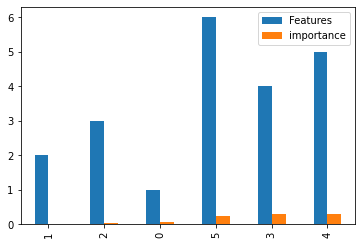

In [127]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
rf_selector = RandomForestClassifier(n_estimators = 100)
rf_selector.fit(X,y)
importance = rf_selector.feature_importances_
final = pd.DataFrame({"Features":X.columns,"importance":importance})
final.set_index('importance')
f = final.sort_values('importance')
f.plot.bar()

In [128]:
i = pd.DataFrame(importance)

<AxesSubplot:>

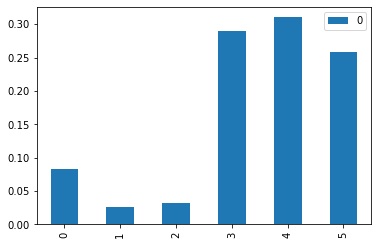

In [129]:
i.plot.bar()

In [133]:
X = X.drop([2,3],axis = 1)

KeyError: '[2 3] not found in axis'

In [134]:
print(X)

       1         4         5    6
0    1.0  0.053453  0.363636  1.0
1    0.0  0.525559  0.654545  0.0
2    1.0  0.058430  0.436364  0.0
3    0.0  0.391497  0.600000  0.0
4    1.0  0.059351  0.600000  1.0
..   ...       ...       ...  ...
655  0.5  0.077415  0.472727  1.0
656  0.0  0.221185  0.309091  0.0
657  1.0  0.172893  0.455751  0.0
658  0.0  0.221185  0.436364  1.0
659  1.0  0.057139  0.545455  1.0

[660 rows x 4 columns]


In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model_predictions = model.predict(X_test)
train_acc = model.score(X_train,y_train)
test_acc = model.score(X_test,y_test)
print(train_acc)
print(test_acc)

0.7575757575757576
0.7424242424242424
